## WAFER FAULT DETECTION

**Brief:** In electronics, a **wafer** (also called a slice or substrate) is a thin slice of semiconductor, such as a crystalline silicon (c-Si), used for the fabrication of integrated circuits and, in photovoltaics, to manufacture solar cells. The wafer serves as the substrate(serves as foundation for contruction of other components) for microelectronic devices built in and upon the wafer. 

It undergoes many microfabrication processes, such as doping, ion implantation, etching, thin-film deposition of various materials, and photolithographic patterning. Finally, the individual microcircuits are separated by wafer dicing and packaged as an integrated circuit.

## Problem Statement

**Data:** Wafers data


**Problem Statement:** Wafers are predominantly used to manufacture solar cells and are located at remote locations in bulk and they themselves consist of few hundreds of sensors. Wafers are fundamental of photovoltaic power generation, and production thereof requires high technology. Photovoltaic power generation system converts sunlight energy directly to electrical energy.

The motto behind figuring out the faulty wafers is to obliterate the need of having manual man-power doing the same. And make no mistake when we're saying this, even when they suspect a certain wafer to be faulty, they had to open the wafer from the scratch and deal with the issue, and by doing so all the wafers in the vicinity had to be stopped disrupting the whole process and stuff anf this is when that certain wafer was indeed faulty, however, when their suspicion came outta be false negative, then we can only imagine the waste of time, man-power and ofcourse, cost incurred.

**Solution:** Data fetched by wafers is to be passed through the machine learning pipeline and it is to be determined whether the wafer at hand is faulty or not apparently obliterating the need and thus cost of hiring manual labour.

In [94]:
### Importing Dependencies

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Reading the dataset
df = pd.read_csv('data\wafer_23012020_041211.csv')
print("The shape of data set is",df.shape)
df.head()

The shape of data set is (100, 592)


,Unnamed: 0,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
0,Wafer-801,2968.33,2476.58,2216.7333,1748.0885,1.1127,100.0,97.5822,0.1242,1.5300,...,NaN,0.5004,0.0120,0.0033,2.4069,0.0545,0.0184,0.0055,33.7876,-1
1,Wafer-802,2961.04,2506.43,2170.0666,1364.5157,1.5447,100.0,96.7700,0.1230,1.3953,...,NaN,0.4994,0.0115,0.0031,2.3020,0.0545,0.0184,0.0055,33.7876,1
2,Wafer-803,3072.03,2500.68,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.3896,...,NaN,0.4987,0.0118,0.0036,2.3719,0.0545,0.0184,0.0055,33.7876,-1
3,Wafer-804,3021.83,2419.83,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.4108,...,NaN,0.4934,0.0123,0.0040,2.4923,0.0545,0.0184,0.0055,33.7876,-1
4,Wafer-805,3006.95,2435.34,2189.8111,1084.6502,1.1993,100.0,104.8856,0.1234,1.5094,...,NaN,0.4987,0.0145,0.0041,2.8991,0.0545,0.0184,0.0055,33.7876,-1


In [3]:
df.describe()

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,Sensor-10,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
count,99.000000,100.000000,97.000000,97.000000,97.000000,97.0,97.000000,97.000000,100.000000,100.000000,...,34.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,3017.301212,2487.180300,2202.168281,1484.362181,1.180367,100.0,97.449088,0.122195,1.461516,0.000243,...,74.331709,0.499390,0.013615,0.003549,2.727297,0.023510,0.014875,0.004685,77.430241,-0.880000
std,71.819707,66.954212,30.350606,460.985871,0.349654,0.0,5.553324,0.002006,0.071300,0.010610,...,41.857728,0.003431,0.004344,0.000873,0.875848,0.011991,0.007557,0.002527,55.106166,0.477367
min,2825.670000,2254.990000,2114.666700,978.783200,0.753100,100.0,83.423300,0.116000,1.317900,-0.027900,...,20.309100,0.492500,0.007600,0.002100,1.515200,0.009900,0.004800,0.001700,20.309100,-1.000000
25%,2973.040000,2446.595000,2189.966700,1111.543600,0.837300,100.0,95.108900,0.120800,1.407375,-0.006925,...,47.356000,0.497300,0.011300,0.003075,2.270425,0.013400,0.009475,0.002700,33.787600,-1.000000
50%,3004.390000,2493.890000,2200.988900,1244.289900,1.156900,100.0,99.513300,0.122200,1.453700,0.001000,...,65.127550,0.499400,0.012750,0.003400,2.546400,0.021800,0.013900,0.003850,62.059500,-1.000000
75%,3070.385000,2527.525000,2213.211100,1963.801600,1.383000,100.0,101.457800,0.123400,1.507425,0.008125,...,99.419050,0.501525,0.014700,0.003825,2.953750,0.028025,0.019200,0.005900,104.303400,-1.000000
max,3221.210000,2664.520000,2315.266700,2363.641200,2.207300,100.0,107.152200,0.126200,1.641100,0.025000,...,223.101800,0.508700,0.043700,0.008900,8.816000,0.054500,0.040100,0.015000,223.101800,1.000000


 * From above data of mean and median, its confirm that there are outliers in some of features.
 * Also some features have standard deviation as zero. Such features can be dropped as they won't contribute in prediction.

In [4]:
#Lets check total null values:

print('Total null/missing values in dataset:',df.isnull().sum().sum())

Total null/missing values in dataset: 2306


In [5]:
# Evaluating missing percentage:
print('Total null/missing percentage in dataset:',df.isnull().sum().sum()/(df.shape[0]* (df.shape[1])))

Total null/missing percentage in dataset: 0.0389527027027027


* Total missing percentage is around 4%

In [6]:
# Checking for Duplicate Values:
print("Total number of Duplicates are",df.duplicated().sum())

Total number of Duplicates are 0


In [7]:
# Checking different data types in our dataset: 
df.dtypes[df.columns].value_counts()

float64    494
int64       97
object       1
Name: count, dtype: int64

In [8]:
# Checking label outcome:

df["Good/Bad"].value_counts()

Good/Bad
-1    94
 1     6
Name: count, dtype: int64

* This shows that data is highly imbalanced and we require upsampling

In [9]:
df.head()


,Unnamed: 0,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
0,Wafer-801,2968.33,2476.58,2216.7333,1748.0885,1.1127,100.0,97.5822,0.1242,1.5300,...,NaN,0.5004,0.0120,0.0033,2.4069,0.0545,0.0184,0.0055,33.7876,-1
1,Wafer-802,2961.04,2506.43,2170.0666,1364.5157,1.5447,100.0,96.7700,0.1230,1.3953,...,NaN,0.4994,0.0115,0.0031,2.3020,0.0545,0.0184,0.0055,33.7876,1
2,Wafer-803,3072.03,2500.68,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.3896,...,NaN,0.4987,0.0118,0.0036,2.3719,0.0545,0.0184,0.0055,33.7876,-1
3,Wafer-804,3021.83,2419.83,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.4108,...,NaN,0.4934,0.0123,0.0040,2.4923,0.0545,0.0184,0.0055,33.7876,-1
4,Wafer-805,3006.95,2435.34,2189.8111,1084.6502,1.1993,100.0,104.8856,0.1234,1.5094,...,NaN,0.4987,0.0145,0.0041,2.8991,0.0545,0.0184,0.0055,33.7876,-1


* Dropping the feature "Unamed:0" as it only contains Wafer-ID which has no contribution on prediction.

In [10]:
# Dropping unwanted features:

df = df.drop(columns= "Unnamed: 0", axis =1)

In [61]:
# Evaluating features whose standard deviations are zero:

feature = df.columns

def std_zero(feature):
    col1 = []
    for i in feature:
        if df[i].std() == 0:
            col1.append(i)

    return col1

In [64]:
drop_feature1 = std_zero(feature)

print("Features to be removed:",drop_feature1)
print("Total features with standard deviation = 0 are",len(drop_feature1))

Features to be removed: ['Sensor-6', 'Sensor-14', 'Sensor-43', 'Sensor-50', 'Sensor-53', 'Sensor-70', 'Sensor-75', 'Sensor-98', 'Sensor-142', 'Sensor-150', 'Sensor-179', 'Sensor-180', 'Sensor-187', 'Sensor-190', 'Sensor-191', 'Sensor-192', 'Sensor-193', 'Sensor-194', 'Sensor-195', 'Sensor-207', 'Sensor-210', 'Sensor-227', 'Sensor-230', 'Sensor-231', 'Sensor-232', 'Sensor-233', 'Sensor-234', 'Sensor-235', 'Sensor-236', 'Sensor-237', 'Sensor-238', 'Sensor-241', 'Sensor-242', 'Sensor-243', 'Sensor-244', 'Sensor-257', 'Sensor-258', 'Sensor-259', 'Sensor-260', 'Sensor-261', 'Sensor-262', 'Sensor-263', 'Sensor-264', 'Sensor-265', 'Sensor-266', 'Sensor-267', 'Sensor-277', 'Sensor-285', 'Sensor-314', 'Sensor-315', 'Sensor-316', 'Sensor-323', 'Sensor-326', 'Sensor-327', 'Sensor-328', 'Sensor-329', 'Sensor-330', 'Sensor-331', 'Sensor-343', 'Sensor-348', 'Sensor-365', 'Sensor-370', 'Sensor-371', 'Sensor-372', 'Sensor-373', 'Sensor-374', 'Sensor-375', 'Sensor-376', 'Sensor-379', 'Sensor-380', 'Sen

In [65]:
#  Evaluating features which have missing values more than 75%:

def miss_threshold(feature,missing):
    column = []
    for i in feature:
        if df[i].isna().mean() > missing:
            column.append(i)

    return column

In [67]:
drop_feature2 = miss_threshold(feature,missing=0.75)

print("Features to be removed:",drop_feature2)
print("Total features with missing values more than 75% are",len(drop_feature2))

Features to be removed: ['Sensor-158', 'Sensor-159', 'Sensor-293', 'Sensor-294']
Total features with missing values more than 75% are 4


In [69]:
# Dropping features:

df = df.drop(columns= drop_feature1,axis=1)
df = df.drop(columns= drop_feature2, axis = 1)

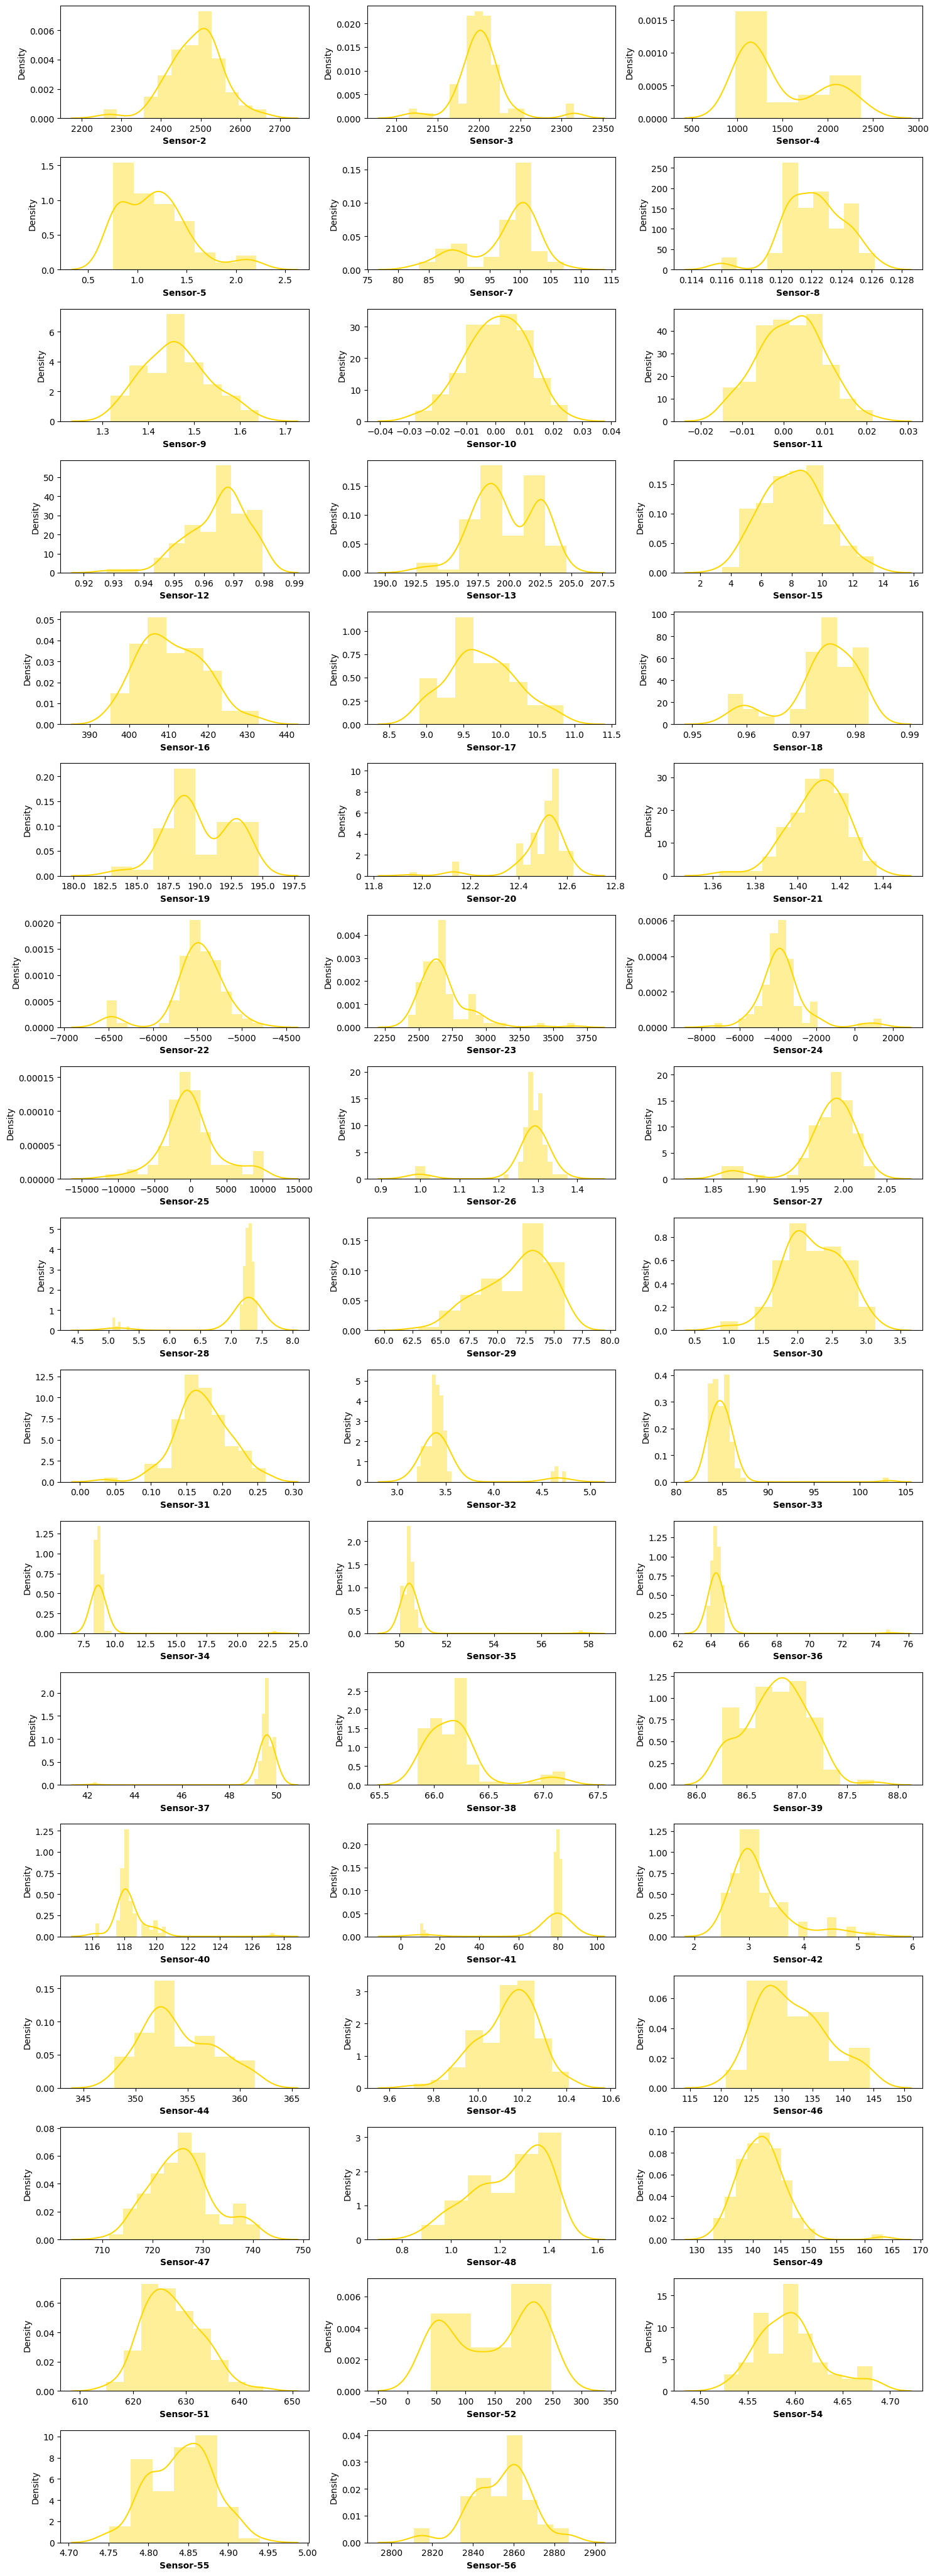

In [82]:
# let's have a look at the distribution first 50 sensors of Wafers

plt.figure(figsize=(15, 60))

for i, colm in enumerate(df.columns[1:51]):
    plt.subplot(25, 3, i+1)
    sns.distplot(x=df[colm], color='#FFD700')
    plt.xlabel(colm, weight='bold')
    plt.tight_layout()

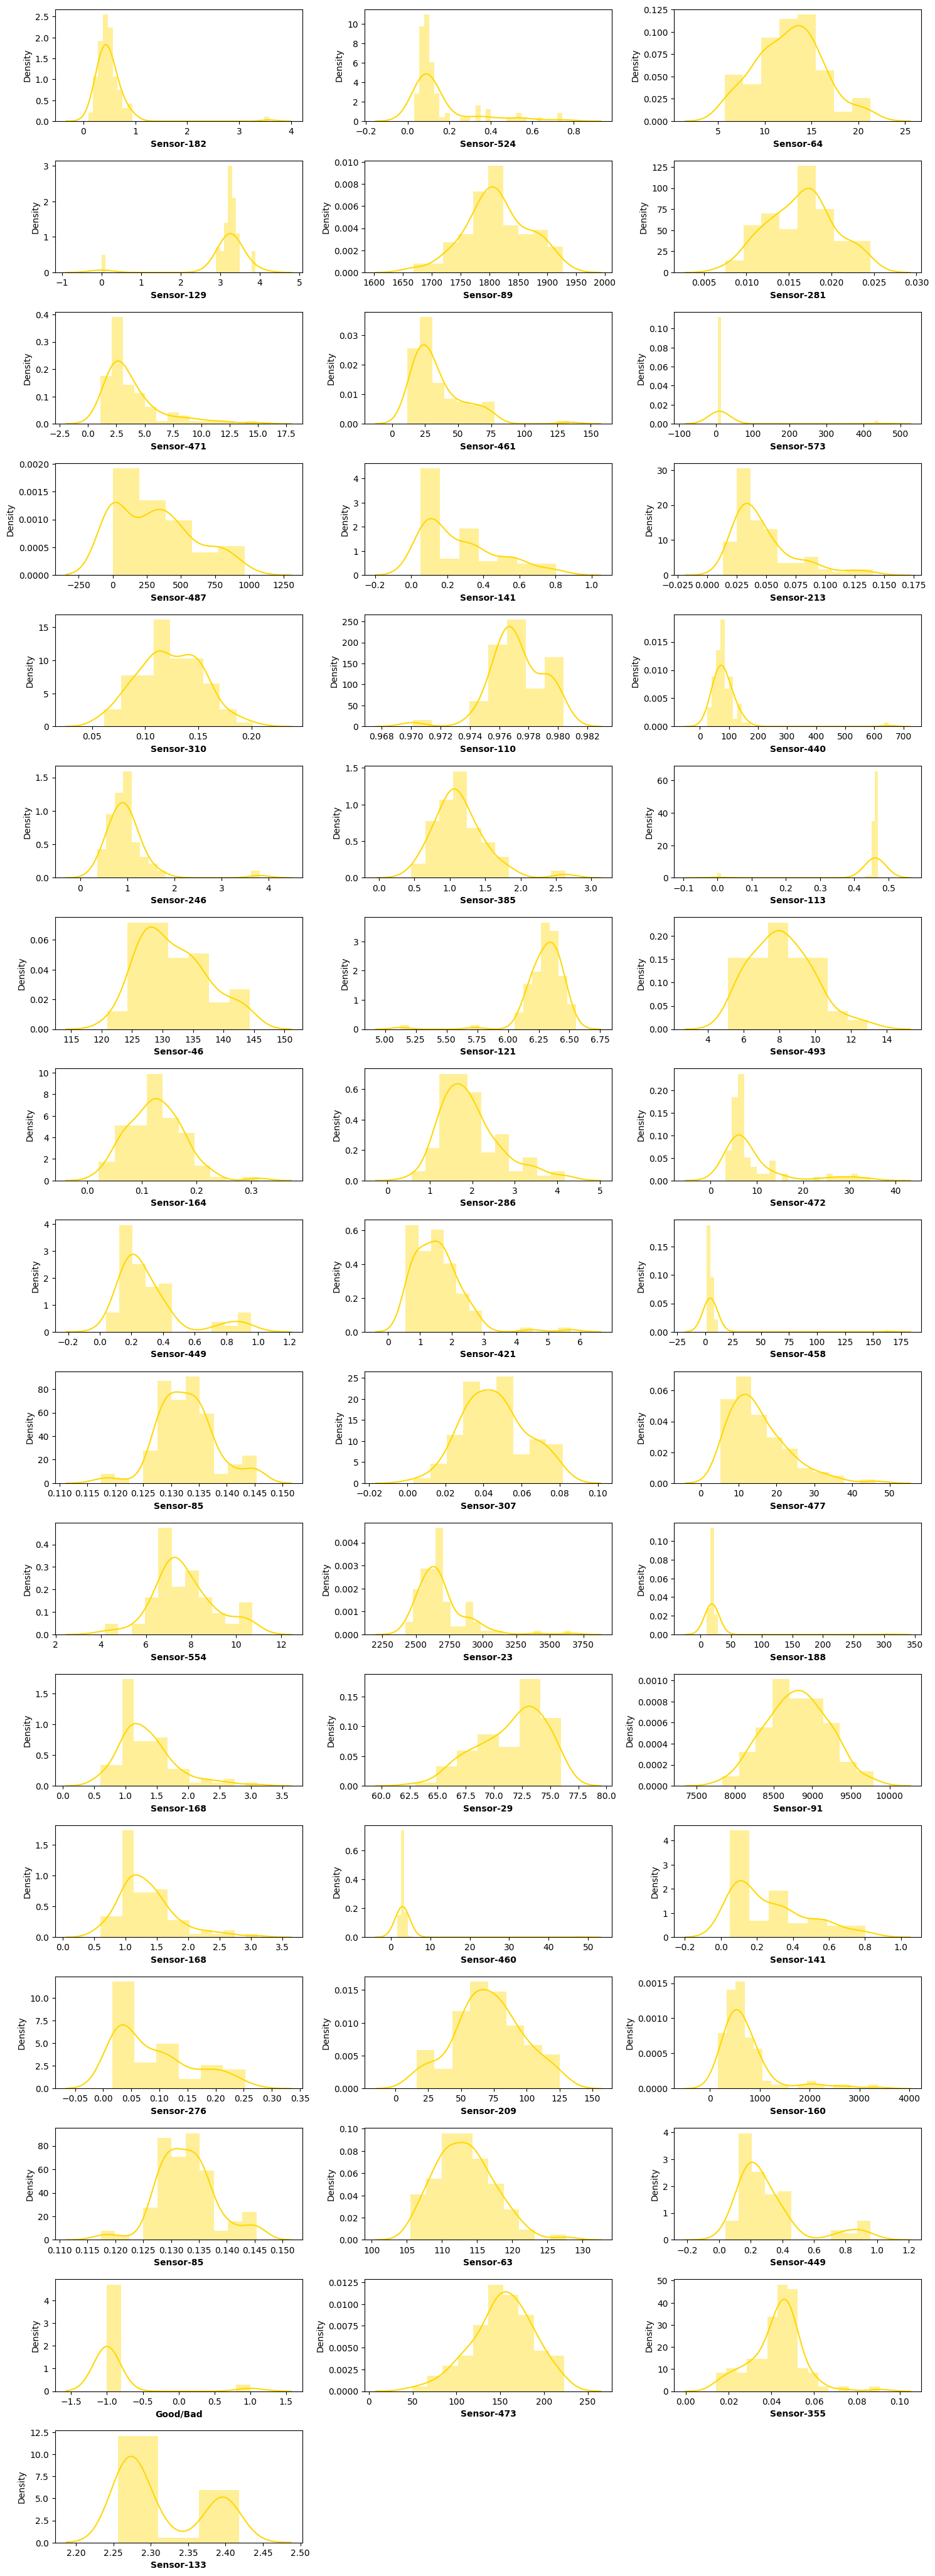

In [85]:
plt.figure(figsize=(15, 60))

random_id = []
for j in range(50):
    if j not in random_id:
        random_id.append(np.random.randint(1,465))

for i, colm in enumerate(df.columns[random_id]):
    plt.subplot(25, 3, i+1)
    sns.distplot(x=df[colm], color='#FFD700')
    plt.xlabel(colm, weight='bold')
    plt.tight_layout()

* Either first 50 or random 50 features all have either normal distribution or have left skewness and right skewness. It ain't possible to analyze each feature and deal with its outliers individually, thus we have to depend on feature scaling to minimize outlier effects.

In [93]:
df.to_csv('filter.csv', index=False,header=True)




  